In [46]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('../../data/audicion.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [48]:
df.shape

(5000, 3)

## EDA

In [49]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

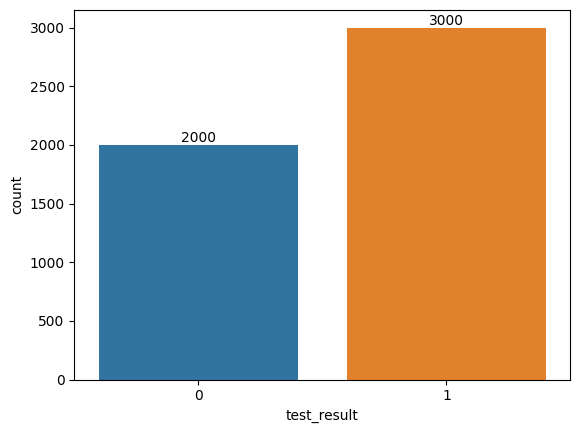

In [50]:
ax = sns.countplot(data=df, x='test_result')
ax.bar_label(ax.containers[0]);

<Axes: xlabel='test_result', ylabel='age'>

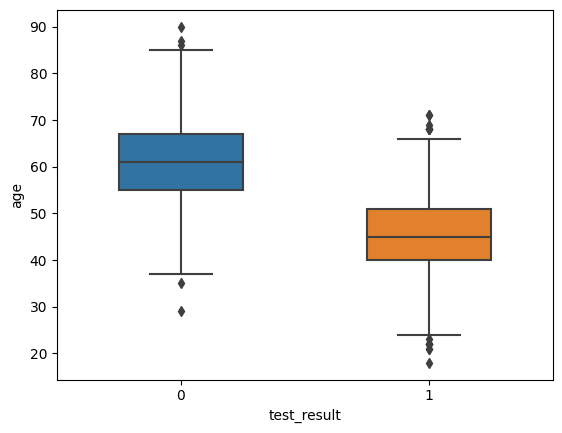

In [51]:
sns.boxplot(data=df, x='test_result', y='age', width=0.5)

<Axes: xlabel='test_result', ylabel='physical_score'>

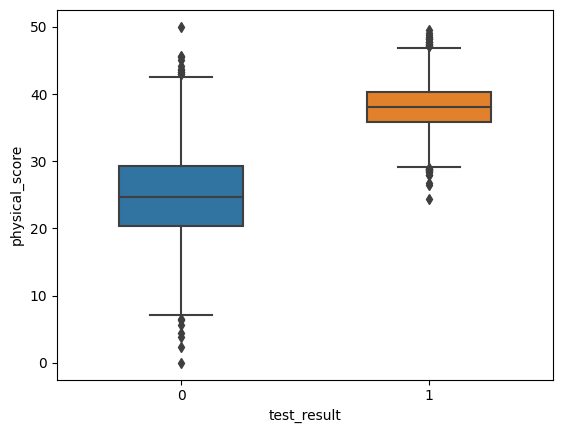

In [52]:
sns.boxplot(data=df, x='test_result', y='physical_score', width=0.5)

<Axes: xlabel='age', ylabel='physical_score'>

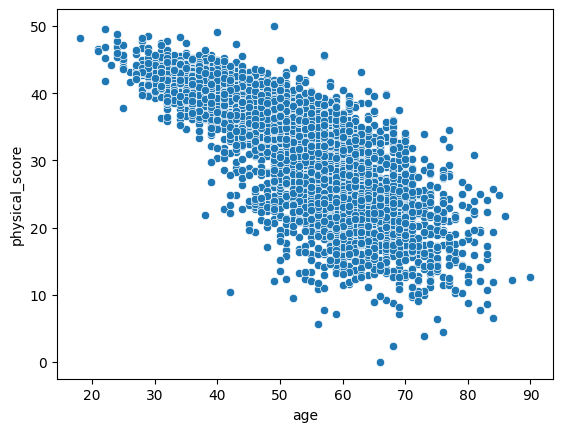

In [53]:
# age y physical_score
sns.scatterplot(data=df, x='age', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

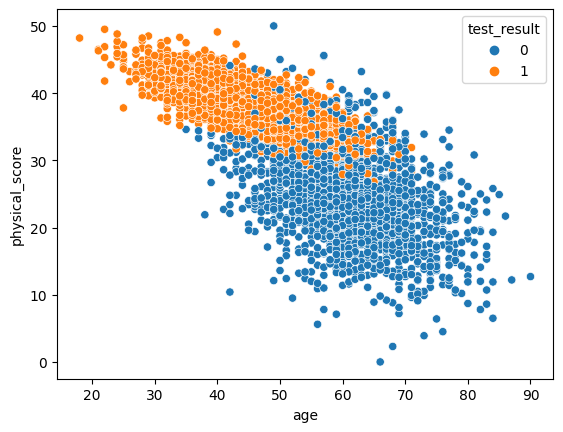

In [54]:
# age y physical_score con hue test_result
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result' )

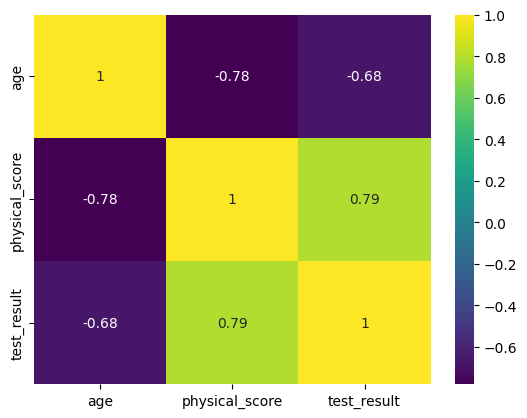

In [55]:
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

In [56]:
X = df[['age', 'physical_score']]
# X = df.drop['test_result', axis=1]
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

# Similar a la regresión lineal pero aplica una función sigmoide para transformar la salida a 0-1
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10] # ny folo voalohany iany


array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[326  58]
 [ 45 571]]


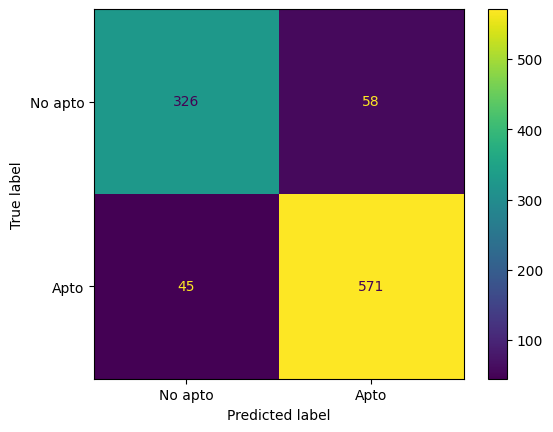

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

"""
* Verdaderos Negativos (TN): 326. El modelo predijo correctamente la clase negativa cuando sé era negativa (No Apto).
* Falsos positivos (FP): 58. El modelo predijo incorrectamente que la clase era positiva (Apto) cuando era negativa.

* Falsos Negativos (FN): 45. El modelo predijo 45 veces incorrectamente que la clase era negativa cuando era positiva.
* Verdaderos Positivos (TP): 571. El modelo prdijo 571 correctamente que la clase positiva (Apto) sí es positiva (Apto)
"""

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['No apto', 'Apto'])
disp = disp.plot()

In [60]:
# Accuracy (Exactitud): mide la proporción de predicciones correctas (tanto positivas como negativas) en relación
# con todas las predicciones realiadas
# TP + TN / TP + TN + FP + FN

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.897

In [61]:
# Precisión: mide la proporción de predicciones positivas que son realmente correctas.
# Cuando el modelo predice que un ejemplo es positivo (Apto), la precisióon dice la probabilidad de que esa predicción sea correcta
# TP / (TP + FP)
# The best value is 1 and the worst value is 0

from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

# La precisión considera como total las veces que el modelo predijo la clase positiva, y cuenta cúantas de esas veces  lo hizo correctamente

0.9077901430842608

In [62]:
# Recall (Sensibilidad): mide la proporción de verdaderos positivos que el modelo es capaz de detectar
# mide la proporción de verdaderos positivos que el modelo es capaz de detectar
# mide la proporción de verdaderos positivos que se identificaron correctamente
# TP / TP + FN

from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

# recall se centra en los valores reales (True Positive) y (False Negative) y cuenta qué porcentaje de los positivos reales 

0.926948051948052

In [63]:
# Todas  las métricas

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       384
           1       0.91      0.93      0.92       616

    accuracy                           0.90      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000



 * Acurracy : el modelo hizo una predicción correcta el 91% de las veces
 * Precisión: que cuando el modelo predice que un individuo es 'Apto', es correcto el 90.8 % de las veces
 * Recall: El modelo detecta correctamente el 92.7% de los individuos 'Apto' en los datos.
 * F1-Score: es una media entre Precision y Recall, equilibrio entre ambas.



Si se observa desbalanceo de clases o desequilibrio puede ser interesante sorregr antes del modelado:

https://imbalanced-learn.org/stable/user_guide.html#user-guide
